# Quiz

## Part 1.

### Get Data

In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, y = load_wine().data, load_wine().target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Make Models

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'DecisionTreeClassifier': DecisionTreeClassifier,
    'RandomForestClassifier': RandomForestClassifier,
    'SVC': SVC,
    'SGDClassifier': SGDClassifier,
    'LogisticRegression': LogisticRegression
}

### Run

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

wine_models, wine_result = dict(), dict()
for name, model in models.items():
    
    classifier = model()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    wine_models[name] = classifier
    wine_result[name] = {
        'accuracy_score': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Evaluate

DecisionTreeClassifier


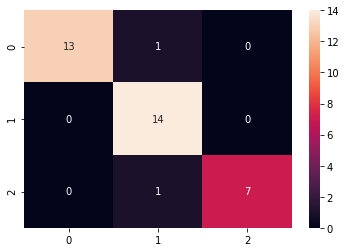

RandomForestClassifier


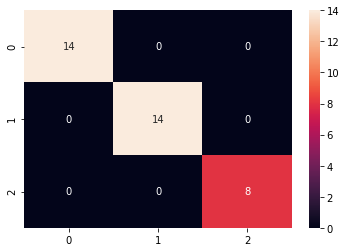

SVC


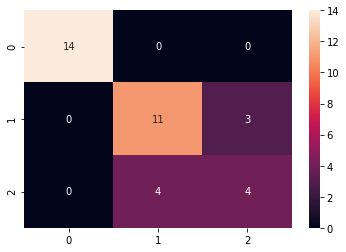

SGDClassifier


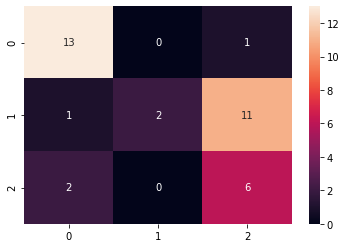

LogisticRegression


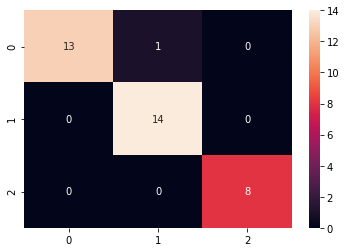

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

insight = 'confusion_matrix'
for name, result in wine_result.items():
    
    print(name)
    sns.heatmap(result[insight], annot=True)
    plt.show()

## Part 2. With Function

In [8]:
from sklearn.datasets import load_wine, load_breast_cancer, load_digits
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
def run(dataset='wine'):
    
    data_list = {
        'wine': load_wine,
        'breast_cancer': load_breast_cancer,
        'digits': load_digits,
        }
    
    models = {
        'DecisionTreeClassifier': DecisionTreeClassifier,
        'RandomForestClassifier': RandomForestClassifier,
        'SVC': SVC,
        'SGDClassifier': SGDClassifier,
        'LogisticRegression': LogisticRegression
        }
    
    results = dict()
    for name, model in models.items():
    
        classifier = model()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        models[name] = classifier
        results[name] = {
            'accuracy_score': accuracy_score(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }
        print(name)
        sns.heatmap(results[name]['confusion_matrix'], annot=True)
        plt.show()

DecisionTreeClassifier


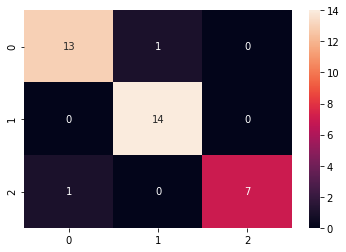

RandomForestClassifier


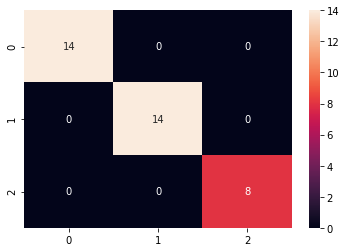

SVC


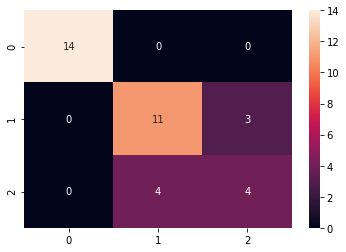

SGDClassifier


C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


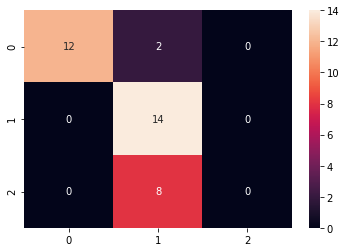

C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression


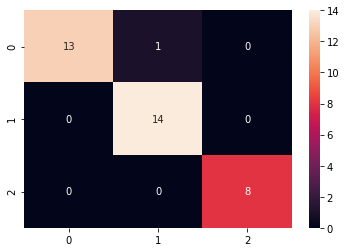

In [10]:
run(dataset='wine')

## Part 3. Class

In [11]:
class AutoML:

    
    def __init__(self, data='wine', test_size=0.2):
            
        data_list = {
            'wine': load_wine,
            'breast_cancer': load_breast_cancer,
            'digits': load_digits,
            }

        models = {
            'DecisionTreeClassifier': DecisionTreeClassifier,
            'RandomForestClassifier': RandomForestClassifier,
            'SVC': SVC,
            'SGDClassifier': SGDClassifier,
            'LogisticRegression': LogisticRegression
            }
    
        self.dataset = data_list[data]()
        X, y = self.dataset.data, self.dataset.target
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        self.models, self.results = dict(), dict()
        
        
    def fit(self):
        
        for name, model in models.items():
    
            classifier = model()
            classifier.fit(self.X_train, self.y_train)
            self.models[name] = classifier
            
            
    def predict(self):
        
        for name, model in self.models.items():
            
            y_pred = model.predict(self.X_test)
            self.results[name] = {
                'accuracy_score': accuracy_score(self.y_test, y_pred),
                'classification_report': classification_report(self.y_test, y_pred),
                'confusion_matrix': confusion_matrix(self.y_test, y_pred)
            }
            
    def show(self, insight='classification_report'):
        
        for name, model in self.results.items():

            print(name)
            if insight == 'confusion_matrix':
                sns.heatmap(result[insight], annot=True)
                plt.show()

            else:
                print(result[insight])

In [15]:
automl = AutoML(data='breast_cancer')

DecisionTreeClassifier


C:\Users\pha\anaconda3\envs\1pha\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


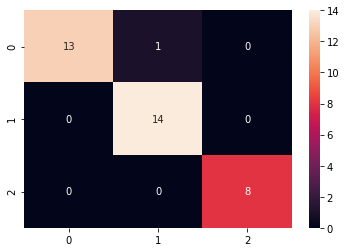

RandomForestClassifier


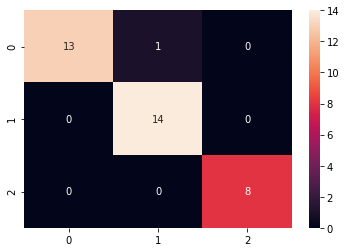

SVC


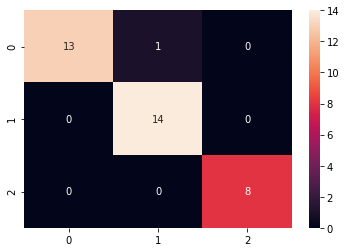

SGDClassifier


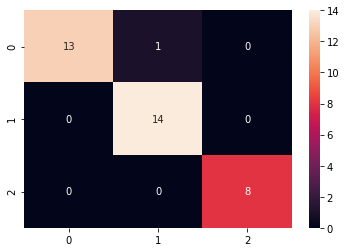

LogisticRegression


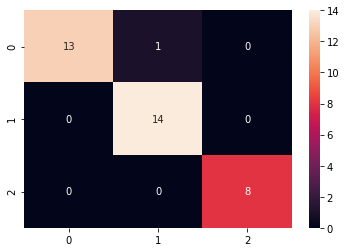

In [16]:
automl.fit()
automl.predict()
automl.show(insight='confusion_matrix')